#### Phase 5 Project

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from nltk import WordNetLemmatizer 
from nltk.corpus import wordnet 
from nltk import pos_tag 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score

#### Summary of Analysis
- The First Model is Random Forest Classifier for Balanced Attrition as the target variable. This includes Precision, Recall, F1 Score, and Accuracy. This is all summarized in a classification report. A Roc curve was also generated for the Random Forest Classifier.
- Cross Validation was conducted and generated higher scores for both Train and Test data. 
- 3 other additional models were added. These models are a Logistic Regression, Decision Tree Classifier, and Multinomial.
- This process was conducted for Unbalanced and Balanced Attrition.
- Gender and Marital Status were also used as target variables.
- Marital Status was a Multi-Class target variable and study with multiple models generated 
- Hyperparameters were created with more iterations and then higher tolerance were displayed in a Confusion Matrix. 
- A SMOTE function was created for the Random Forest Classifier.
- A Linear Regression was created for the monthly income variable. Statistical Signficance was found for multiple dependent variables.

## Load Data - Attrition Balanced

In [8]:
df = pd.read_csv('HR_Analytics.csv')
df['Attrition'].value_counts()

No     1242
Yes     238
Name: Attrition, dtype: int64

In [9]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


#### Drop Columns

In [10]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11
1476,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,...,3,4,80,0,22,5,4,18,13,13
1477,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,3,4,80,0,10,1,3,2,2,2
1478,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,...,3,2,80,1,12,3,3,11,7,1


#### One Hot Encode Target Variable

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['Attrition'])
encoded_data
df['Attrition'] = pd.DataFrame(encoded_data, columns = ['Attrition'], index=df['Attrition'].index)
df['Attrition'].value_counts()

0    1242
1     238
Name: Attrition, dtype: int64

#### Balance Dataset

In [12]:
df['Attrition'].value_counts()

0    1242
1     238
Name: Attrition, dtype: int64

In [13]:
ones = df[df.iloc[:,2] == 1]
zeros = df[df.iloc[:,2] == 0]
zeros.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
3,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
5,18,18-25,0,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,...,3,3,80,0,0,5,4,0,0,0
7,18,18-25,0,Non-Travel,1431,Research & Development,14,3,Medical,1,...,3,3,80,0,0,4,1,0,0,0
9,19,18-25,0,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,3,4,80,0,1,3,3,1,0,0


In [14]:
zeros.iloc[:238,2].value_counts()

0    238
Name: Attrition, dtype: int64

In [15]:
zerosdf = zeros.iloc[:238, :]
zerosdf.shape

(238, 36)

In [16]:
ones.shape

(238, 36)

In [17]:
df = pd.concat([zerosdf,ones], axis=0)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
3,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
5,18,18-25,0,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,...,3,3,80,0,0,5,4,0,0,0
7,18,18-25,0,Non-Travel,1431,Research & Development,14,3,Medical,1,...,3,3,80,0,0,4,1,0,0,0
9,19,18-25,0,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,3,4,80,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,58,55+,1,Travel_Rarely,147,Research & Development,23,4,Medical,1,...,3,4,80,1,40,3,2,40,10,15
1455,58,55+,1,Travel_Rarely,286,Research & Development,2,4,Life Sciences,1,...,3,4,80,0,40,2,3,31,15,13
1456,58,55+,1,Travel_Frequently,781,Research & Development,2,1,Life Sciences,1,...,3,4,80,1,3,3,2,1,0,0
1458,58,55+,1,Travel_Rarely,289,Research & Development,2,3,Technical Degree,1,...,4,1,80,0,7,4,3,1,0,0


#### Train Test Set

In [18]:
y = df['Attrition']
X = df.drop(columns=['Attrition'], axis=1)
X.head()
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: Attrition, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
y_train

214    0
84     0
220    1
89     0
117    0
      ..
306    1
268    0
173    0
82     0
240    0
Name: Attrition, Length: 357, dtype: int64

#### One Hot Encode Train Data

In [22]:
numbers = df[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]]
numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_validate

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[["AgeGroup","Gender","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(),index=X_train.index)
X_train_ = pd.concat([numbers,X_train_onehot], axis = 1)
X_train_.dropna(inplace=True)
X_train_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
1,18,812,10,3,1,411,4,69,2,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,18,1124,1,3,1,1368,4,97,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,18,1431,14,3,1,1839,2,33,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,19,1181,3,1,1,201,2,79,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14,19,645,9,2,1,1193,3,54,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,55,267,13,4,1,1372,1,85,4,4,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1446,56,310,7,2,1,2032,4,72,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,58,781,2,1,1,918,4,57,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1458,58,289,2,3,1,977,4,51,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Transform Test Object Variables

In [23]:
test_dummies = ohe.transform(X_test[["AgeGroup","Gender","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])

test_ = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names_out(),
                    index=X_test.index)
X_test_ = pd.concat([X_test[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]], test_], axis=1)
X_test_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
322,29,592,7,3,1,1883,4,59,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
222,28,1300,17,2,1,536,3,79,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
245,28,1496,1,3,1,1486,1,92,3,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
438,31,561,3,3,1,1537,4,33,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
151,26,683,2,1,1,1407,1,36,2,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,25,867,19,2,1,952,3,36,2,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
319,29,726,29,1,1,1859,4,93,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
994,40,676,9,4,1,1534,4,86,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
718,35,737,10,3,1,1639,4,55,2,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### First Model - Random Forest Classifier

In [24]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

#### Random Forest Metrics

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
y_hat_train = forest.predict(X_train_)
y_hat_test = forest.predict(X_test_)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.9685534591194969
Testing Precision:  0.47619047619047616



Training Recall:  0.8850574712643678
Testing Recall:  0.3125



Training Accuracy:  0.9299719887955182
Testing Accuracy:  0.44537815126050423



Training F1-Score:  0.9249249249249248
Testing F1-Score:  0.37735849056603776


#### Classification Report

In [27]:
y_pred = forest.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       183
           1       0.97      0.89      0.92       174

    accuracy                           0.93       357
   macro avg       0.93      0.93      0.93       357
weighted avg       0.93      0.93      0.93       357




- Accuracy, Precision, Recall, and f1-scores are all above 90% for train data

In [28]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.60      0.50        55
           1       0.48      0.31      0.38        64

    accuracy                           0.45       119
   macro avg       0.45      0.46      0.44       119
weighted avg       0.45      0.45      0.43       119




- Metrics were lower for test data so likely overfitting that needs cross validation

#### Cross Validation on Test Data

In [29]:
cv_results = cross_validate(
                    estimator=forest,
                    X=X_test_,
                    y=y_test,
                    cv=5,
                    return_train_score=True)

In [30]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [31]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(forest, X_test_, y_test, cv=num_folds, scoring=metric)
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.79166667 0.75       0.95833333 0.79166667 0.69565217]
Mean Accuracy CV Score: 0.797463768115942

F1 Cross-Validation Scores: [0.69565217 0.8        0.96296296 0.75862069 0.7       ]
Mean F1 CV Score: 0.7834471653062358

Precision Cross-Validation Scores: [0.88888889 0.76923077 0.92857143 0.6875     1.        ]
Mean Precision CV Score: 0.8548382173382173

Recall Cross-Validation Scores: [0.53846154 0.69230769 1.         0.84615385 0.58333333]
Mean Recall CV Score: 0.7320512820512821

Roc_auc Cross-Validation Scores: [0.83216783 0.85314685 1.         0.96503497 0.86363636]
Mean Roc_auc CV Score: 0.9027972027972029



- Mean Accuracy score is strong for cross validation of test data at 79%.
- All other metrics are strong and above 70%
- Highest value is the mean roc score of 90%.

#### ROC Curve

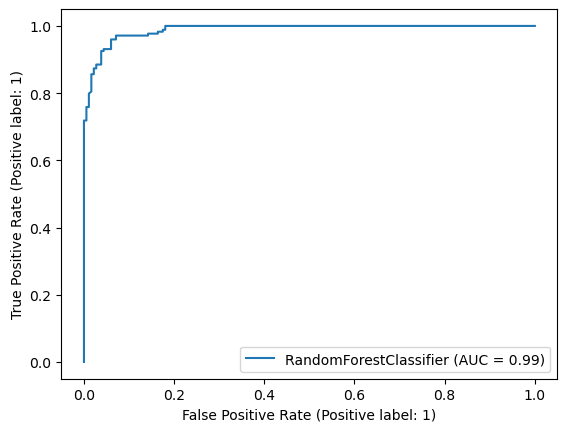

In [32]:
RocCurveDisplay.from_estimator(forest, X_train_, y_train);

- 99% for Balanced Attrition Train Dataset

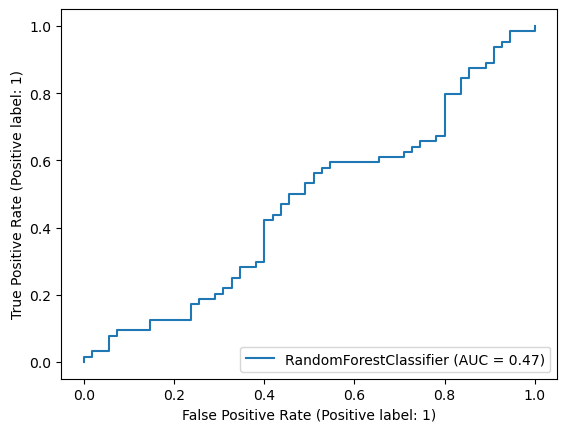

In [33]:
RocCurveDisplay.from_estimator(forest, X_test_, y_test);

- Roc Score before cross validation is low at 47%
- With cross validation it was a mean score of 90% for the test data

#### Additional Models

In [34]:
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, classification_report

In [39]:
models = []
model1 = LogisticRegression(max_iter=10000) 
model1.fit(X_train_, y_train) 
models.append(model1)

In [40]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_, y_train) 
models.append(model2)

In [41]:
model3 = MultinomialNB() 
model3.fit(X_train_, y_train) 
models.append(model3)

In [42]:
for i, model in enumerate(models):
    y_pred = model.predict(X_train_)
    accuracy = accuracy_score(y_train, y_pred)
    report = classification_report(y_train, y_pred)
    print(f"Model {i + 1} - Accuracy: {accuracy}\nClassification Report:\n{report}\n")

Model 1 - Accuracy: 0.6330532212885154
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       183
           1       0.63      0.60      0.62       174

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.63       357
weighted avg       0.63      0.63      0.63       357


Model 2 - Accuracy: 0.9971988795518207
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       183
           1       1.00      0.99      1.00       174

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357


Model 3 - Accuracy: 0.5042016806722689
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       183
           1       0.49      0.44      0.47      

- Logistic Regression had an accuracy of 0.63
- Decision Tree Classifier had an accuracy of 1.00
- Multinomial had an accuracy of 0.50 so cross validation was most essential for this model due to overfitting

In [43]:
model1 = LogisticRegression(max_iter=10000) 
model1.fit(X_train_, y_train)

LogisticRegression(max_iter=10000)

In [44]:
y_pred = model1.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       183
           1       0.63      0.60      0.62       174

    accuracy                           0.63       357
   macro avg       0.63      0.63      0.63       357
weighted avg       0.63      0.63      0.63       357




In [45]:
y_pred = model1.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        55
           1       0.58      0.58      0.58        64

    accuracy                           0.55       119
   macro avg       0.54      0.54      0.54       119
weighted avg       0.55      0.55      0.55       119




In [200]:
cv_results = cross_validate(
                    estimator=model1,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [201]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [202]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model1, X_test_, y_test, cv=num_folds, scoring=metric)
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.79166667 0.79166667 0.75       0.70833333 0.56521739]
Mean Accuracy CV Score: 0.7213768115942029

F1 Cross-Validation Scores: [0.8        0.8        0.76923077 0.74074074 0.54545455]
Mean F1 CV Score: 0.7310852110852111

Precision Cross-Validation Scores: [0.83333333 0.83333333 0.76923077 0.71428571 0.6       ]
Mean Precision CV Score: 0.7500366300366301

Recall Cross-Validation Scores: [0.76923077 0.76923077 0.76923077 0.76923077 0.5       ]
Mean Recall CV Score: 0.7153846153846154

Roc_auc Cross-Validation Scores: [0.8951049  0.86013986 0.86713287 0.72727273 0.74242424]
Mean Roc_auc CV Score: 0.8184149184149184



- Cross validation of train data led to 72% mean accuracy
- All other metrics were above 70%.
- These are stronger results than the initial model for Logistic Regression

In [46]:
cv_results = cross_validate(
                    estimator=model1,
                    X=X_test_,
                    y=y_test,
                    cv=5,
                    return_train_score=True)

In [47]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [48]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model1, X_test_, y_test, cv=num_folds, scoring=metric)
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.79166667 0.79166667 0.75       0.70833333 0.56521739]
Mean Accuracy CV Score: 0.7213768115942029

F1 Cross-Validation Scores: [0.8        0.8        0.76923077 0.74074074 0.54545455]
Mean F1 CV Score: 0.7310852110852111

Precision Cross-Validation Scores: [0.83333333 0.83333333 0.76923077 0.71428571 0.6       ]
Mean Precision CV Score: 0.7500366300366301

Recall Cross-Validation Scores: [0.76923077 0.76923077 0.76923077 0.76923077 0.5       ]
Mean Recall CV Score: 0.7153846153846154

Roc_auc Cross-Validation Scores: [0.8951049  0.86013986 0.86713287 0.72727273 0.74242424]
Mean Roc_auc CV Score: 0.8184149184149184



- Metrics were all above 70% with the cross validation for the test data on the Logistic Regression

In [49]:
model3 = MultinomialNB() 
model3.fit(X_train_, y_train) 

MultinomialNB()

In [50]:
y_pred = model3.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       183
           1       0.49      0.44      0.47       174

    accuracy                           0.50       357
   macro avg       0.50      0.50      0.50       357
weighted avg       0.50      0.50      0.50       357




In [51]:
y_pred = model3.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.56      0.50        55
           1       0.52      0.41      0.46        64

    accuracy                           0.48       119
   macro avg       0.48      0.48      0.48       119
weighted avg       0.49      0.48      0.48       119




In [52]:
cv_results = cross_validate(
                    estimator=model3,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [53]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [54]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(forest, X_test_, y_test, cv=num_folds, scoring=metric)
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.79166667 0.70833333 0.91666667 0.79166667 0.7826087 ]
Mean Accuracy CV Score: 0.7981884057971014

F1 Cross-Validation Scores: [0.66666667 0.8        0.96296296 0.78571429 0.7       ]
Mean F1 CV Score: 0.783068783068783

Precision Cross-Validation Scores: [0.875      0.9        0.86666667 0.75       0.77777778]
Mean Precision CV Score: 0.8338888888888889

Recall Cross-Validation Scores: [0.53846154 0.69230769 1.         0.92307692 0.58333333]
Mean Recall CV Score: 0.7474358974358976

Roc_auc Cross-Validation Scores: [0.9020979  0.87412587 0.99300699 0.95104895 0.87121212]
Mean Roc_auc CV Score: 0.9182983682983682



- All metrics of the train data cross validation for the Multinomial model were above 70%

In [55]:
cv_results = cross_validate(
                    estimator=model3,
                    X=X_test_,
                    y=y_test,
                    cv=5,
                    return_train_score=True)

In [56]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [57]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model3, X_test_, y_test, cv=num_folds, scoring=metric)
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.41666667 0.54166667 0.66666667 0.58333333 0.47826087]
Mean Accuracy CV Score: 0.5373188405797101

F1 Cross-Validation Scores: [0.36363636 0.26666667 0.63636364 0.64285714 0.45454545]
Mean F1 CV Score: 0.4728138528138528

Precision Cross-Validation Scores: [0.44444444 1.         0.77777778 0.6        0.5       ]
Mean Precision CV Score: 0.6644444444444445

Recall Cross-Validation Scores: [0.30769231 0.15384615 0.53846154 0.69230769 0.41666667]
Mean Recall CV Score: 0.4217948717948718

Roc_auc Cross-Validation Scores: [0.43356643 0.67132867 0.74125874 0.58741259 0.40530303]
Mean Roc_auc CV Score: 0.5677738927738928



- The mean precision of the test data cross validation was somewhat strong at 66%.

#### Hyperparameters

In [59]:
logreg_model_more_iterations = LogisticRegression(random_state=2022, penalty = None, max_iter=5000)
logreg_model_more_iterations.fit(X_train_, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=2022)

In [60]:
logreg_model_higher_tolerance = LogisticRegression(
                                                random_state=2022, 
                                                penalty=None, 
                                                tol=25
)
logreg_model_higher_tolerance.fit(X_train_, y_train)

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=2022, tol=25)

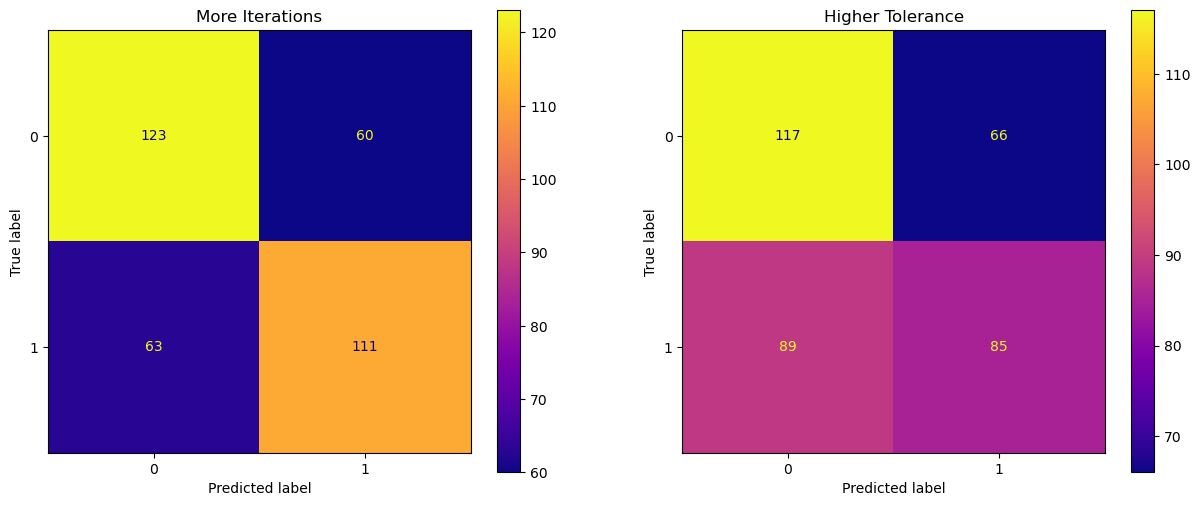

In [61]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

ConfusionMatrixDisplay.from_estimator(logreg_model_more_iterations, X_train_, y_train, ax=axes[0], cmap="plasma")
ConfusionMatrixDisplay.from_estimator(logreg_model_higher_tolerance, X_train_, y_train, ax=axes[1], cmap="plasma");

#### Analysis

- There were more instances where the model was displaying true negatives than true positives for the confusion matrix with more iterations
- The Higher Tolerance model had the same trend. The number of True positives decreased, the true negatives decreased less. The false positives increased and the false negatives increased. 

## Attrition Unbalanced after Gender Study

## Load Data - Gender Balanced

In [67]:
df = pd.read_csv('HR_Analytics.csv')
df['Gender'].value_counts()

Male      889
Female    591
Name: Gender, dtype: int64

In [68]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

#### Drop Columns with NAs

In [70]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

#### Bar Graphs for Target Variables

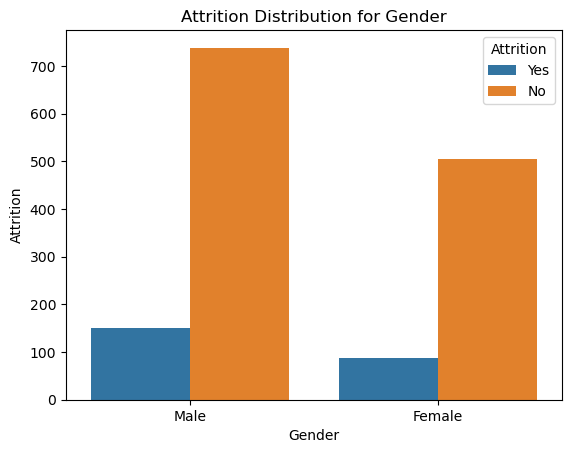

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', hue='Attrition', data=df)
plt.xlabel('Gender')
plt.ylabel('Attrition')
plt.title('Attrition Distribution for Gender')
plt.show()

#### One Hot Encode Target Variable

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['Gender'])
encoded_data
df['Gender'] = pd.DataFrame(encoded_data, columns = ['Gender'], index=df['Gender'].index)
df['Gender'].value_counts()

1    889
0    591
Name: Gender, dtype: int64

#### Balance Dataset

In [73]:
df['Gender'].value_counts()

1    889
0    591
Name: Gender, dtype: int64

In [74]:
ones = df[df.iloc[:,12] == 1]
zeros = df[df.iloc[:,12] == 0]
zeros

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
5,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,...,3,3,80,0,0,5,4,0,0,0
6,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,...,3,3,80,0,0,2,4,0,0,0
7,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,1,...,3,3,80,0,0,4,1,0,0,0
9,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,...,3,4,80,0,1,3,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,59,55+,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,4,80,1,30,3,3,3,2,2
1471,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,...,3,1,80,0,30,4,3,5,3,4
1473,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,...,3,4,80,0,13,2,3,6,1,0
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11


In [75]:
ones.iloc[:591,12].value_counts()

1    591
Name: Gender, dtype: int64

In [76]:
onesdf = ones.iloc[:591, :]
onesdf.shape

(591, 36)

In [77]:
zeros.shape

(591, 36)

In [78]:
df = pd.concat([onesdf,zeros], axis=0)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
8,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,...,3,4,80,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,59,55+,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,...,4,4,80,1,30,3,3,3,2,2
1471,59,55+,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,...,3,1,80,0,30,4,3,5,3,4
1473,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,...,3,4,80,0,13,2,3,6,1,0
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11


#### Train Test Set

In [82]:
y = df['Gender']
X = df.drop(columns=['Gender'], axis=1)
X.head()
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: Gender, dtype: float64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
y_train

560     1
501     1
365     0
1048    0
902     1
       ..
1129    0
449     0
620     0
920     1
261     0
Name: Gender, Length: 886, dtype: int64

#### One Hot Encode Train Data

In [84]:
numbers = df[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]]
numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_validate

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[["AgeGroup","Attrition","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(),index=X_train.index)
X_train_ = pd.concat([numbers,X_train_onehot], axis = 1)
X_train_.dropna(inplace=True)
X_train_.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'AgeGroup_26-35', 'AgeGroup_36-45',
       'AgeGroup_46-55', 'AgeGroup_55+', 'Attrition_Yes',
       'BusinessTravel_TravelRarely', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_

#### Transform Test Object Variables

In [85]:
test_dummies = ohe.transform(X_test[["AgeGroup","Attrition","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])

test_ = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names_out(),
                    index=X_test.index)
X_test_ = pd.concat([X_test[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]], test_], axis=1)
X_test_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
586,34,1354,5,3,1,153,3,45,2,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
573,33,867,8,4,1,1798,4,90,4,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
302,29,337,14,1,1,1421,3,84,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
708,35,660,7,1,1,1492,4,76,3,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
835,37,1252,19,2,1,904,1,32,3,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,40,692,11,3,1,1985,4,73,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
592,34,1362,19,3,1,502,1,67,4,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
387,30,945,9,3,1,1876,2,89,3,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
170,27,472,1,1,1,274,3,60,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### First Simple Model - Random Forest Classifier

In [86]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

#### Metrics

In [88]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
y_hat_train = forest.predict(X_train_)
y_hat_test = forest.predict(X_test_)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.7578947368421053
Testing Precision:  0.4895833333333333



Training Recall:  0.9515418502202643
Testing Recall:  0.6861313868613139



Training Accuracy:  0.8194130925507901
Testing Accuracy:  0.5236486486486487



Training F1-Score:  0.84375
Testing F1-Score:  0.5714285714285714


#### Classification Report

In [89]:
y_pred = forest.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79       432
           1       0.76      0.95      0.84       454

    accuracy                           0.82       886
   macro avg       0.84      0.82      0.81       886
weighted avg       0.84      0.82      0.82       886




In [90]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.38      0.46       159
           1       0.49      0.69      0.57       137

    accuracy                           0.52       296
   macro avg       0.54      0.53      0.52       296
weighted avg       0.54      0.52      0.51       296




#### Roc Curve

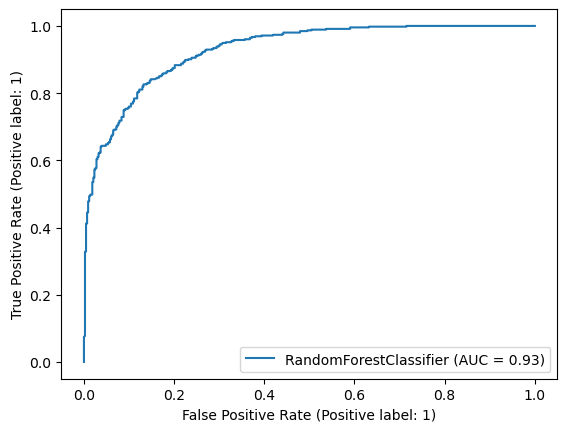

In [91]:
RocCurveDisplay.from_estimator(forest, X_train_, y_train);

#### Summary of Results

- Train data for Random Forest Classifier is strong with most metrics between 70-90%.
- Roc value for train data was at 93%
- Cross validation implemented for test data since overfitting likely occured. 

#### Cross Validation

In [92]:
cv_results = cross_validate(
                    estimator=forest,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [93]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [94]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(forest, X_train_, y_train, cv=num_folds, scoring=metric)

    # Print the cross-validation scores for the current metric
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.50561798 0.48587571 0.34463277 0.45762712 0.46327684]
Mean Accuracy CV Score: 0.4514060813813242

F1 Cross-Validation Scores: [0.66135458 0.60550459 0.34090909 0.63157895 0.32258065]
Mean F1 CV Score: 0.5123855704536144

Precision Cross-Validation Scores: [0.51875    0.51145038 0.39285714 0.51538462 0.68      ]
Mean Precision CV Score: 0.5236884279842295

Recall Cross-Validation Scores: [0.94505495 0.72527473 0.2967033  0.71428571 0.25555556]
Mean Recall CV Score: 0.5873748473748474

Roc_auc Cross-Validation Scores: [0.51042061 0.48236647 0.28405316 0.40978789 0.49469987]
Mean Roc_auc CV Score: 0.436265599914357



- The mean recall score for the test data was a bit more promising at 58%.
- The other metrics were still low for this model.

#### Additional Models

In [95]:
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, classification_report

In [96]:
models = []
model1 = LogisticRegression(max_iter=10000) 
model1.fit(X_train_, y_train) 
models.append(model1)

In [97]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_, y_train) 
models.append(model2)

In [98]:
model3 = MultinomialNB() 
model3.fit(X_train_, y_train) 
models.append(model3)

In [99]:
for i, model in enumerate(models):
    y_pred = model.predict(X_test_)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model {i + 1} - Accuracy: {accuracy}\nClassification Report:\n{report}\n")

Model 1 - Accuracy: 0.5033783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.45      0.49       159
           1       0.47      0.57      0.51       137

    accuracy                           0.50       296
   macro avg       0.51      0.51      0.50       296
weighted avg       0.51      0.50      0.50       296


Model 2 - Accuracy: 0.5033783783783784
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       159
           1       0.47      0.52      0.49       137

    accuracy                           0.50       296
   macro avg       0.50      0.50      0.50       296
weighted avg       0.51      0.50      0.50       296


Model 3 - Accuracy: 0.543918918918919
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.45      0.52       159
           1       0.51      0.65      0.57       

- All three of these models had low scores for Gender
- Cross validation was not implemented since this was not a central target variable of the study

#### Hyperparameters

In [100]:
logreg_model_more_iterations = LogisticRegression(random_state=2022, penalty = None, max_iter=5000)
logreg_model_more_iterations.fit(X_train_, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=2022)

In [101]:
logreg_model_higher_tolerance = LogisticRegression(
                                                random_state=2022, 
                                                penalty=None, 
                                                tol=25
)
logreg_model_higher_tolerance.fit(X_train_, y_train)

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=2022, tol=25)

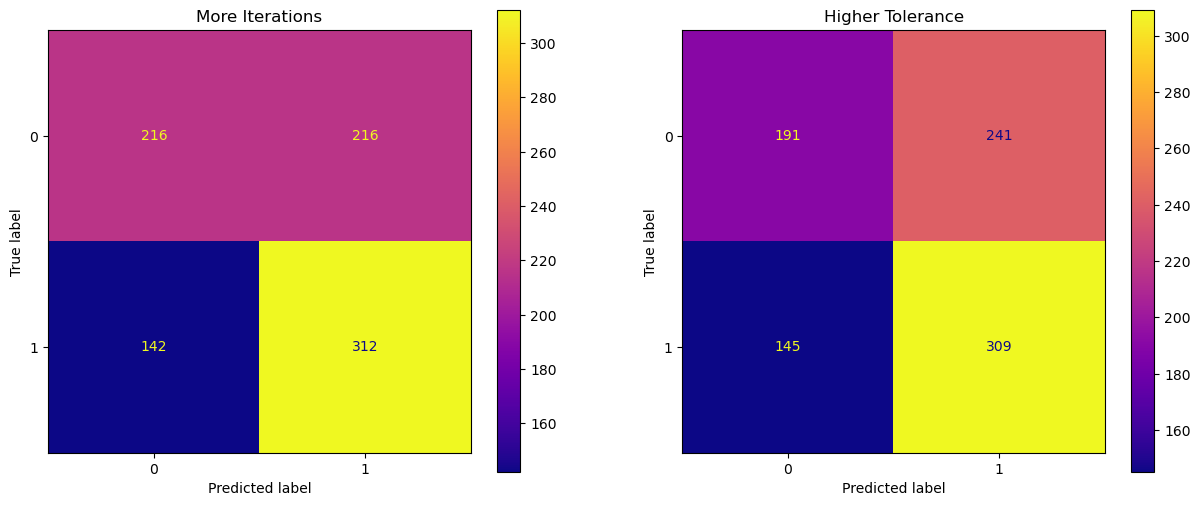

In [102]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")

#plot_confusion_matrix(logreg_model_more_iterations, X_train_imputed, y_train, ax=axes[0], cmap="plasma")
#plot_confusion_matrix(logreg_model_higher_tolerance, X_train_imputed, y_train, ax=axes[1], cmap="plasma");

ConfusionMatrixDisplay.from_estimator(logreg_model_more_iterations, X_train_, y_train, ax=axes[0], cmap="plasma")
ConfusionMatrixDisplay.from_estimator(logreg_model_higher_tolerance, X_train_, y_train, ax=axes[1], cmap="plasma");

#### Analysis

- There were more instances where the model was displaying true positives than true negatives for the confusion matrix with more iterations
- The Higher Tolerance model had the same trend. The number of True positives decreased, the true negatives decreased more. The false positives increased and the false negatives increased even more.

## Attrition - Unbalanced Study

In [107]:
df = pd.read_csv('HR_Analytics.csv')
df['Attrition'].value_counts()

No     1242
Yes     238
Name: Attrition, dtype: int64

#### Drop NAs

In [108]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

#### One Hot Encode Target Variables

In [109]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['Attrition'])
encoded_data
df['Attrition'] = pd.DataFrame(encoded_data, columns = ['Attrition'], index=df['Attrition'].index)
df['Attrition'].value_counts()

0    1242
1     238
Name: Attrition, dtype: int64

#### Train Test Set

In [110]:
y = df['Attrition']
X = df.drop(columns=['Attrition'], axis=1)
X.head()
y.value_counts(normalize=True)

0    0.839189
1    0.160811
Name: Attrition, dtype: float64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
y_train

1183    0
609     0
581     0
1047    0
938     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 1110, dtype: int64

#### One Hot Encode Train Data

In [112]:
numbers = df[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]]
numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, cross_validate

ohe = OneHotEncoder(drop='first')
dummies = ohe.fit_transform(X_train[["AgeGroup","Gender","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])
X_train_onehot = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names_out(),index=X_train.index)
X_train_ = pd.concat([numbers,X_train_onehot], axis = 1)
X_train_.dropna(inplace=True)
X_train_.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
0,18,230,3,3,1,405,3,54,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,18,287,5,2,1,1012,2,73,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,18,544,3,2,1,1624,2,70,3,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
7,18,1431,14,3,1,1839,2,33,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,19,602,1,1,1,235,3,100,1,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Test Object Variables

In [113]:
test_dummies = ohe.transform(X_test[["AgeGroup","Gender","BusinessTravel","Department",
                                     "EducationField","JobRole","MaritalStatus","SalarySlab","Over18",
                                     "OverTime"]])

test_ = pd.DataFrame(test_dummies.todense(), columns=ohe.get_feature_names_out(),
                    index=X_test.index)
X_test_ = pd.concat([X_test[["Age","DailyRate","DistanceFromHome","Education","EmployeeCount","EmployeeNumber","EnvironmentSatisfaction",
              "HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked",
              "PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StandardHours","StockOptionLevel",
              "TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole",
              "YearsSinceLastPromotion"]], test_], axis=1)
X_test_

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
567,33,392,2,4,1,1670,4,93,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1041,41,1200,22,3,1,1392,4,75,3,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
649,34,735,3,1,1,1915,4,75,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
666,35,662,1,5,1,204,3,94,3,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
568,33,530,16,3,1,1681,3,36,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,32,1125,16,1,1,33,2,72,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1328,50,1421,2,3,1,1215,4,30,3,4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
575,33,1303,7,2,1,1970,4,36,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1421,55,444,2,1,1,1074,3,40,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### First Simple Model

In [114]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [115]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

In [116]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
y_hat_train = forest.predict(X_train_)
y_hat_test = forest.predict(X_test_)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.0



Training Recall:  0.005555555555555556
Testing Recall:  0.0



Training Accuracy:  0.8387387387387387
Testing Accuracy:  0.8432432432432433



Training F1-Score:  0.011049723756906079
Testing F1-Score:  0.0


/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
y_pred = forest.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       930
           1       1.00      0.01      0.01       180

    accuracy                           0.84      1110
   macro avg       0.92      0.50      0.46      1110
weighted avg       0.86      0.84      0.77      1110




In [118]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       312
           1       0.00      0.00      0.00        58

    accuracy                           0.84       370
   macro avg       0.42      0.50      0.46       370
weighted avg       0.71      0.84      0.77       370




/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

- The accuracy scores are high for both the train and test data at 84%
- It's clear that the data is unbalanced, however, from the previous Attrition balanced study it is reassuring to find there were strong results

#### Cross Validation for Test Data

In [124]:
cv_results = cross_validate(
                    estimator=forest,
                    X=X_test_,
                    y=y_test,
                    cv=5,
                    return_train_score=True)

In [125]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [126]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(forest, X_test_, y_test, cv=num_folds, scoring=metric)

    # Print the cross-validation scores for the current metric
    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.86486486 0.85135135 0.83783784 0.83783784 0.85135135]
Mean Accuracy CV Score: 0.8486486486486486

F1 Cross-Validation Scores: [0.16666667 0.         0.         0.         0.15384615]
Mean F1 CV Score: 0.06410256410256411



/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision Cross-Validation Scores: [1. 0. 1. 0. 1.]
Mean Precision CV Score: 0.6

Recall Cross-Validation Scores: [0.09090909 0.09090909 0.16666667 0.         0.08333333]
Mean Recall CV Score: 0.08636363636363636

Roc_auc Cross-Validation Scores: [0.61183261 0.79076479 0.78225806 0.69086022 0.74865591]
Mean Roc_auc CV Score: 0.7248743192291579



- The roc score was stronger at a value of 72%

#### ROC Curve

In [127]:
from sklearn.metrics import roc_curve,RocCurveDisplay

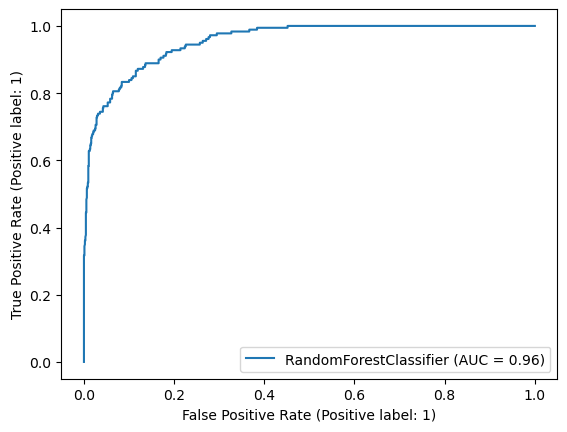

In [128]:
RocCurveDisplay.from_estimator(forest, X_train_, y_train);

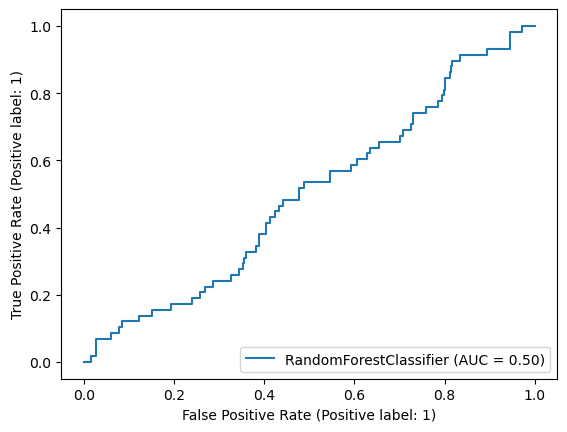

In [129]:
RocCurveDisplay.from_estimator(forest, X_test_, y_test);

#### Feature Importances

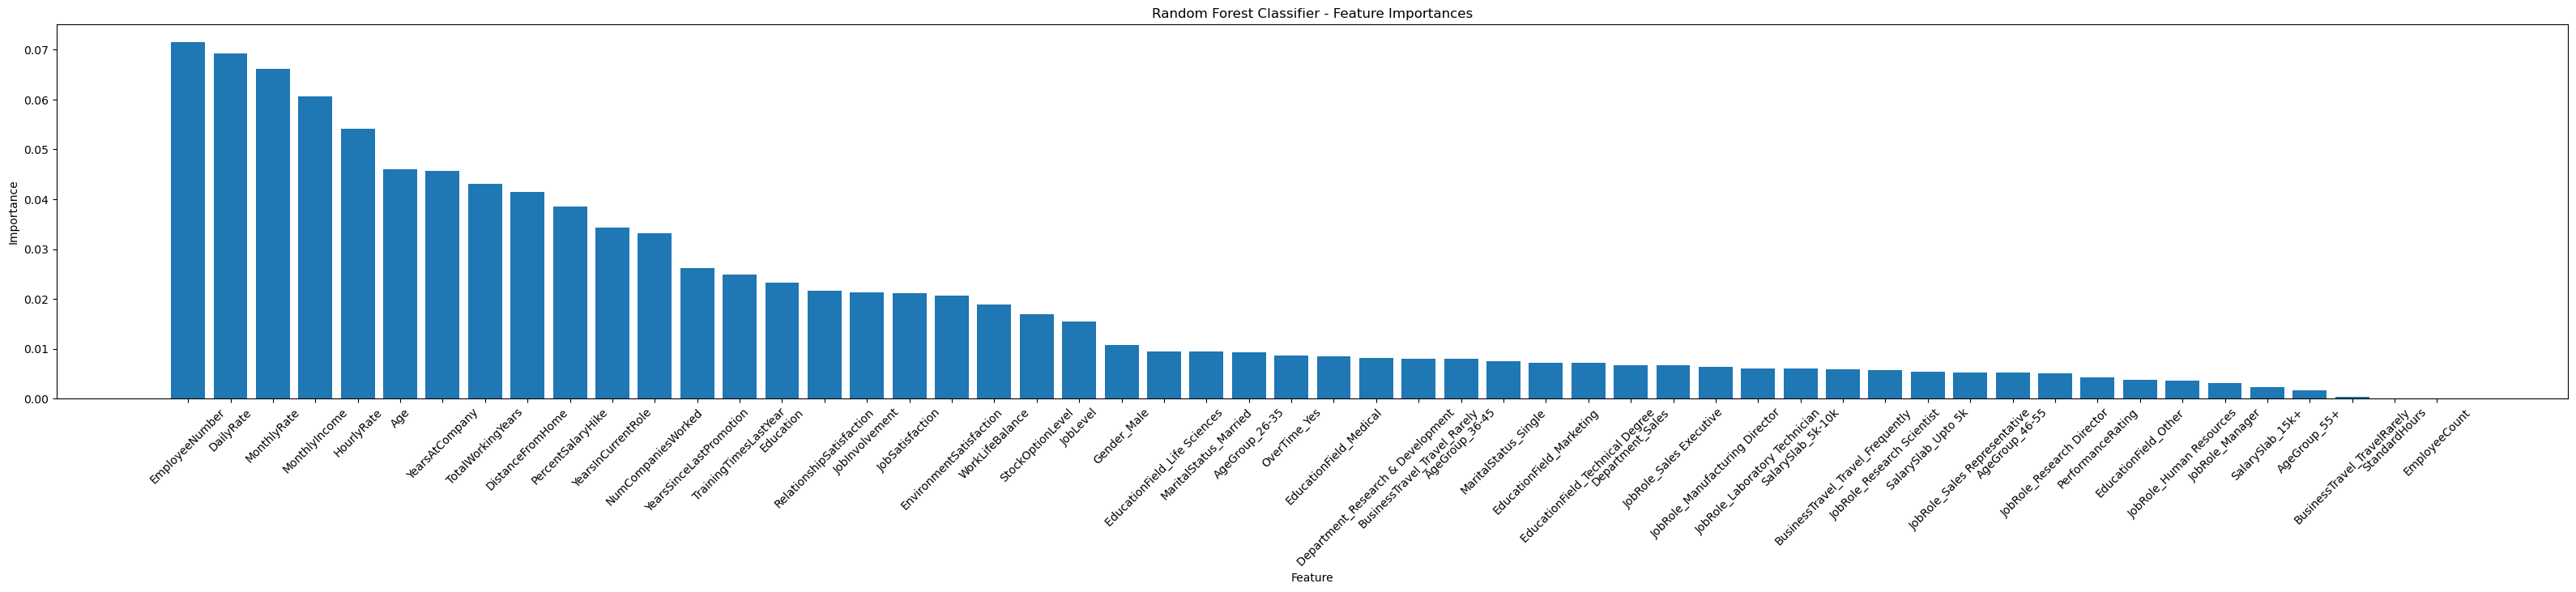

In [130]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_, y_train)
feature_importances = rf_classifier.feature_importances_
feature_names = X_train_.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(40, 6))
plt.bar(range(X_train_.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Classifier - Feature Importances")
plt.show()

#### Additional Models

In [131]:
models = []
model1 = LogisticRegression(max_iter=10000) 
model1.fit(X_train_, y_train) 
models.append(model1)

In [132]:
model2 = DecisionTreeClassifier() 
model2.fit(X_train_, y_train) 
models.append(model2)

In [133]:
model3 = MultinomialNB() 
model3.fit(X_train_, y_train) 
models.append(model3)

In [134]:
for i, model in enumerate(models):
    y_pred = model.predict(X_test_)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model {i + 1} - Accuracy: {accuracy}\nClassification Report:\n{report}\n")

Model 1 - Accuracy: 0.8432432432432433
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       312
           1       0.00      0.00      0.00        58

    accuracy                           0.84       370
   macro avg       0.42      0.50      0.46       370
weighted avg       0.71      0.84      0.77       370


Model 2 - Accuracy: 0.7405405405405405
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       312
           1       0.22      0.26      0.24        58

    accuracy                           0.74       370
   macro avg       0.54      0.54      0.54       370
weighted avg       0.76      0.74      0.75       370


Model 3 - Accuracy: 0.4891891891891892
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.52      0.63       312
           1       0.12      0.34      0.17      

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

#### Analysis

- Model 1, the Logistic Regression, has a high accuracy score at 0.83. However, since the data is unbalanced for Attrition, the scores are high for attrition and very low for not having attrition
- Model 2, the Random Forest Classifier, has a high acccuracy score of 0.72.
- Model 3, the Mulitnomial, has the lowest score with an accuracy score of 0.489. The scores are more evenly distributed for this model, however, still skewed toward the no attrition column.

#### Cross Validation

In [135]:
cv_results = cross_validate(
                    estimator=model1,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [136]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [137]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model1, X_train_, y_train, cv=num_folds, scoring=metric)

    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.83783784 0.83783784 0.83783784 0.83783784 0.83783784]
Mean Accuracy CV Score: 0.8378378378378379

F1 Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean F1 CV Score: 0.0



/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/pyt

Precision Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean Precision CV Score: 0.0

Recall Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean Recall CV Score: 0.0

Roc_auc Cross-Validation Scores: [0.46206691 0.49395161 0.50253883 0.52889785 0.56966846]
Mean Roc_auc CV Score: 0.5114247311827957



In [138]:
cv_results = cross_validate(
                    estimator=model1,
                    X=X_test_,
                    y=y_test,
                    cv=5,
                    return_train_score=True)

In [139]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [140]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model1, X_test_, y_test, cv=num_folds, scoring=metric)

    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.86486486 0.87837838 0.82432432 0.83783784 0.89189189]
Mean Accuracy CV Score: 0.8594594594594595

F1 Cross-Validation Scores: [0.16666667 0.47058824 0.31578947 0.25       0.55555556]
Mean F1 CV Score: 0.3517199862401101

Precision Cross-Validation Scores: [1.         0.66666667 0.42857143 0.5        0.83333333]
Mean Precision CV Score: 0.6857142857142857

Recall Cross-Validation Scores: [0.09090909 0.36363636 0.25       0.16666667 0.41666667]
Mean Recall CV Score: 0.25757575757575757

Roc_auc Cross-Validation Scores: [0.65512266 0.68398268 0.80107527 0.66263441 0.78091398]
Mean Roc_auc CV Score: 0.7167457990038635



In [142]:
cv_results = cross_validate(
                    estimator=model3,
                    X=X_test_,
                    y=y_test,
                    cv=5,
                    return_train_score=True)

In [143]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [144]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model3, X_test_, y_test, cv=num_folds, scoring=metric)

    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.56756757 0.54054054 0.47297297 0.43243243 0.52702703]
Mean Accuracy CV Score: 0.508108108108108

F1 Cross-Validation Scores: [0.30434783 0.29166667 0.36065574 0.08695652 0.28571429]
Mean F1 CV Score: 0.2658682075823915

Precision Cross-Validation Scores: [0.2        0.18918919 0.2244898  0.05882353 0.18918919]
Mean Precision CV Score: 0.17233834074170212

Recall Cross-Validation Scores: [0.63636364 0.63636364 0.91666667 0.16666667 0.58333333]
Mean Recall CV Score: 0.5878787878787879

Roc_auc Cross-Validation Scores: [0.61399711 0.63419913 0.65389785 0.36962366 0.59206989]
Mean Roc_auc CV Score: 0.5727575292091421



#### Hyperparameters

In [145]:
logreg_model_more_iterations = LogisticRegression(random_state=2022, penalty = None, max_iter=5000)
logreg_model_more_iterations.fit(X_train_, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=2022)

In [146]:
logreg_model_higher_tolerance = LogisticRegression(
                                                random_state=2022, 
                                                penalty=None, 
                                                tol=25
)
logreg_model_higher_tolerance.fit(X_train_, y_train)

/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None, random_state=2022, tol=25)

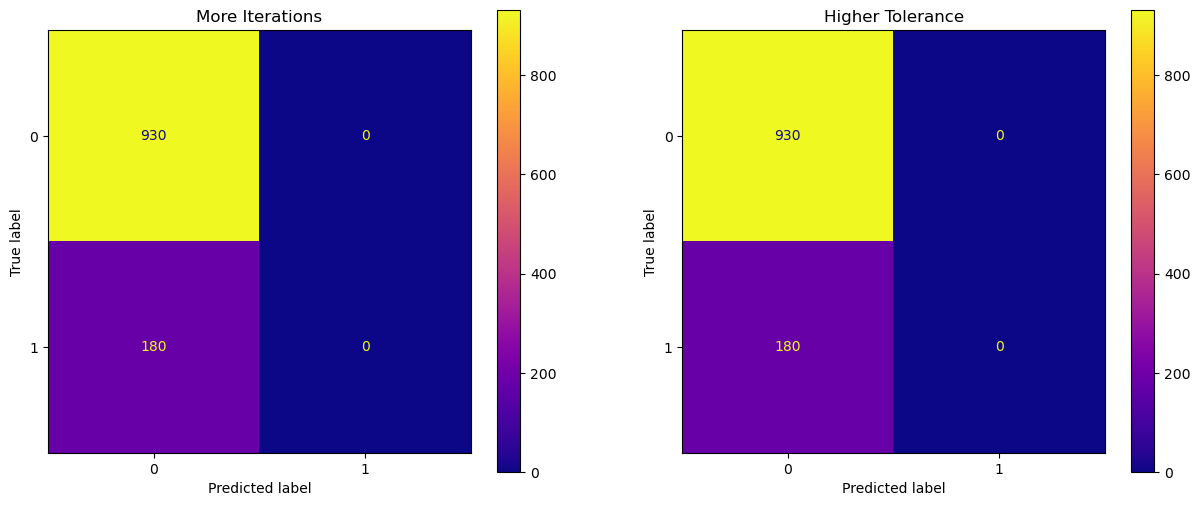

In [147]:
fix, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].set_title("More Iterations")
axes[1].set_title("Higher Tolerance")


ConfusionMatrixDisplay.from_estimator(logreg_model_more_iterations, X_train_, y_train, ax=axes[0], cmap="plasma")
ConfusionMatrixDisplay.from_estimator(logreg_model_higher_tolerance, X_train_, y_train, ax=axes[1], cmap="plasma");

#### Cross Validation for Logistic Regression

In [148]:
cv_results = cross_validate(
                    estimator=model1,
                    X=X_train_,
                    y=y_train,
                    cv=5,
                    return_train_score=True)

In [149]:
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

In [179]:
num_folds = 5
for metric in scoring_metrics:
    cross_val_scores = cross_val_score(model1, X_train_, y_train, cv=num_folds, scoring=metric)

    print(f"{metric.capitalize()} Cross-Validation Scores:", cross_val_scores)
    print(f"Mean {metric.capitalize()} CV Score: {cross_val_scores.mean()}\n")

Accuracy Cross-Validation Scores: [0.83783784 0.83783784 0.83783784 0.83783784 0.83783784]
Mean Accuracy CV Score: 0.8378378378378379

F1 Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean F1 CV Score: 0.0



/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/pyt

Precision Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean Precision CV Score: 0.0

Recall Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean Recall CV Score: 0.0

Roc_auc Cross-Validation Scores: [0.45624253 0.46363501 0.48715651 0.48125747 0.60446535]
Mean Roc_auc CV Score: 0.4985513739545997



#### Linear Regression

In [150]:
#MonthlyIncome as Target Variable
y = df['MonthlyIncome']
X = df[['YearsAtCompany','YearsSinceLastPromotion','TrainingTimesLastYear','TotalWorkingYears',
       'PerformanceRating','MonthlyRate','YearsInCurrentRole','HourlyRate']]

In [151]:
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [152]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     274.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.95e-285
Time:                        14:38:40   Log-Likelihood:                -13937.
No. Observations:                1480   AIC:                         2.789e+04
Df Residuals:                    1471   BIC:                         2.794e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

- The model has statistical significance and highlights 60% of the variance in Monthly Income
- The coefficient is signficant at the 1% level
- YearsAtCompany is signficant at the 5% level. TotalWorkingYears is sigificant at the 1% level

In [153]:
y = df['MonthlyIncome']
X = df[['YearsAtCompany','TotalWorkingYears']]

In [154]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.36e-292
Time:                        14:39:03   Log-Likelihood:                -13941.
No. Observations:                1480   AIC:                         2.789e+04
Df Residuals:                    1477   BIC:                         2.790e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1183.5236    138.80

- For a Linear Regression where MonthlyIncome is the target variable, YearsAtCompany and TotalWorkingYears are
  significant at the 1% level. The R**2 value is consistent at the 0.59 level.
- This r**2 value highlights 60% of the variance in monthly income.
- The constant is sigificant at the 1% level.


In [155]:
#Years in Current Role as Target Variable
y = df['YearsInCurrentRole']
X = df[['YearsAtCompany','YearsSinceLastPromotion','MonthlyIncome','TrainingTimesLastYear','TotalWorkingYears',
       'PerformanceRating','MonthlyRate','HourlyRate']]

In [156]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:     YearsInCurrentRole   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     262.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          5.79e-277
Time:                        14:39:21   Log-Likelihood:                -3345.4
No. Observations:                1480   AIC:                             6709.
Df Residuals:                    1471   BIC:                             6757.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- For a Linear Regression where YearsInCurrentRole is the target variable, YearsAtCompany and TotalWorkingYears are
  significant at the 1% level. The R**2 value is consistent at the 0.58 level.
- This r**2 value highlights 58% of the variance in our YearsInCurrentRole variable.
- The constant is sigificant at the 1% level.

In [157]:
y = df['YearsInCurrentRole']
X = df[['YearsSinceLastPromotion','YearsAtCompany']]

In [158]:
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:     YearsInCurrentRole   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1045.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.41e-283
Time:                        14:39:27   Log-Likelihood:                -3349.3
No. Observations:                1480   AIC:                             6705.
Df Residuals:                    1477   BIC:                             6720.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

- For a Linear Regression where YearsInCurrentRole is the target variable, YearsSinceLastPromotion and YearsAtCompany are
  significant at the 1% level. The R**2 value is consistent at the 0.58 level.
- This r**2 value highlights 58% of the variance in our YearsInCurrentRole variable.
- The constant is sigificant at the 1% level.

#### Multiclass for other Variables

In [159]:
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
1,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
2,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,0,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11
1476,60,55+,0,Travel_Frequently,1499,Sales,28,3,Marketing,1,...,3,4,80,0,22,5,4,18,13,13
1477,60,55+,0,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,3,4,80,0,10,1,3,2,2,2
1478,60,55+,0,Travel_Rarely,696,Sales,7,4,Marketing,1,...,3,2,80,1,12,3,3,11,7,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1480 non-null   int64 
 1   AgeGroup                  1480 non-null   object
 2   Attrition                 1480 non-null   int64 
 3   BusinessTravel            1480 non-null   object
 4   DailyRate                 1480 non-null   int64 
 5   Department                1480 non-null   object
 6   DistanceFromHome          1480 non-null   int64 
 7   Education                 1480 non-null   int64 
 8   EducationField            1480 non-null   object
 9   EmployeeCount             1480 non-null   int64 
 10  EmployeeNumber            1480 non-null   int64 
 11  EnvironmentSatisfaction   1480 non-null   int64 
 12  Gender                    1480 non-null   object
 13  HourlyRate                1480 non-null   int64 
 14  JobInvolvement          

In [160]:
df['MaritalStatus'].value_counts()

Married     679
Single      473
Divorced    328
Name: MaritalStatus, dtype: int64

In [161]:
y = df['MaritalStatus']
X = df[['Age','DistanceFromHome','Education','EmployeeCount','PerformanceRating','RelationshipSatisfaction','StandardHours',
        'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
        'YearsSinceLastPromotion','NumCompaniesWorked','EnvironmentSatisfaction','PerformanceRating','PercentSalaryHike','NumCompaniesWorked',
       'MonthlyIncome','JobSatisfaction','JobLevel','JobInvolvement','HourlyRate','EnvironmentSatisfaction','Education',
       'DistanceFromHome','DailyRate']]
X.head()
y.value_counts(normalize=True)

Married     0.458784
Single      0.319595
Divorced    0.221622
Name: MaritalStatus, dtype: float64

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
X_train

,Age,DistanceFromHome,Education,EmployeeCount,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,NumCompaniesWorked,MonthlyIncome,JobSatisfaction,JobLevel,JobInvolvement,HourlyRate,EnvironmentSatisfaction,Education,DistanceFromHome,DailyRate
1183,45,1,4,1,3,4,80,2,8,2,...,3,2270,4,1,3,91,4,4,1,974
609,34,3,2,1,3,3,80,1,4,1,...,0,3737,4,1,3,88,3,2,3,829
581,34,23,4,1,4,3,80,0,10,2,...,0,4568,3,2,3,72,2,4,23,1065
1047,41,5,3,1,3,1,80,0,11,3,...,3,6870,2,2,4,85,2,3,5,447
938,39,6,3,1,3,1,80,1,11,3,...,2,8237,3,3,4,38,4,3,6,1462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,36,14,1,1,3,1,80,1,17,2,...,0,6586,4,2,3,68,3,1,14,1425
835,37,19,2,1,3,4,80,0,10,2,...,1,7642,2,3,3,32,1,2,19,1252
1216,46,10,3,1,3,3,80,1,15,3,...,2,9071,4,3,2,94,3,3,10,1125
559,33,10,5,1,3,4,80,2,10,3,...,0,8380,3,3,4,82,4,5,10,536


In [163]:
from sklearn.preprocessing import StandardScaler
hr_scaler = StandardScaler()
X_train_ = hr_scaler.fit_transform(X_train)
X_test_ = hr_scaler.transform(X_test)

In [164]:
from sklearn.linear_model import LogisticRegression
hr_model = LogisticRegression(max_iter = 10000)
hr_model.fit(X_train_, y_train)
y_pred_hr = hr_model.predict(X_test_)

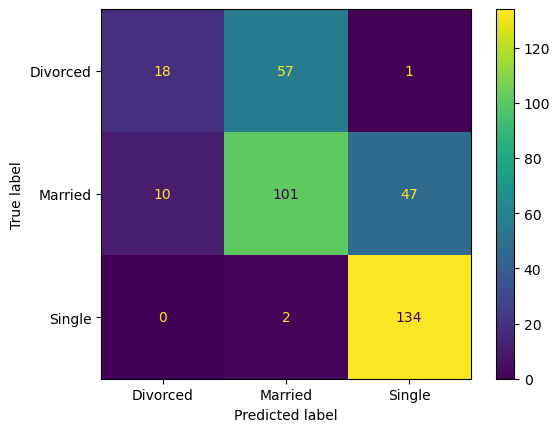

In [165]:
ConfusionMatrixDisplay.from_estimator(hr_model, X_test_, 
                      y_test);

In [166]:
print(classification_report(y_pred_hr, y_test))

              precision    recall  f1-score   support

    Divorced       0.24      0.64      0.35        28
     Married       0.64      0.63      0.64       160
      Single       0.99      0.74      0.84       182

    accuracy                           0.68       370
   macro avg       0.62      0.67      0.61       370
weighted avg       0.78      0.68      0.72       370



- Married and Single had scores above 60%. Those results are somewhat promising
- The accuracy score was 68% and also somewhat promising.
- Ideal for everything to be as far above 50% as possible.

#### Multi-Class Marital Status

In [167]:
df = pd.read_csv('HR_Analytics.csv')
df['MaritalStatus'].value_counts()

Married     679
Single      473
Divorced    328
Name: MaritalStatus, dtype: int64

In [168]:
df = df.drop('YearsWithCurrManager', axis=1)
df = df.drop('EmpID', axis=1)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,3,80,0,0,2,3,0,0,0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,3,1,80,0,0,2,3,0,0,0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,3,4,80,0,0,3,3,0,0,0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,3,4,80,0,0,2,3,0,0,0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,3,4,80,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,3,4,80,0,33,5,1,29,8,11
1476,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,...,3,4,80,0,22,5,4,18,13,13
1477,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,3,4,80,0,10,1,3,2,2,2
1478,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,...,3,2,80,1,12,3,3,11,7,1


In [169]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(df['MaritalStatus'])
encoded_data
df['MaritalStatus'] = pd.DataFrame(encoded_data, columns = ['MaritalStatus'], index=df['MaritalStatus'].index)
df['MaritalStatus'].value_counts()

1    679
2    473
0    328
Name: MaritalStatus, dtype: int64

In [170]:
df.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

In [171]:
zeros = df[df.iloc[:,18] == 0]
ones = df[df.iloc[:,18] == 1]
twos = df[df.iloc[:,18] == 2]

In [172]:
ones.iloc[:328,18].value_counts()
onesdf = ones.iloc[:328, :]
onesdf.shape

(328, 36)

In [173]:
twos.iloc[:328,18].value_counts()
twosdf = twos.iloc[:328, :]
twosdf.shape

(328, 36)

In [174]:
zeros.shape

(328, 36)

In [175]:
df = pd.concat([onesdf,twosdf,zeros], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 43 to 1479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       984 non-null    int64 
 1   AgeGroup                  984 non-null    object
 2   Attrition                 984 non-null    object
 3   BusinessTravel            984 non-null    object
 4   DailyRate                 984 non-null    int64 
 5   Department                984 non-null    object
 6   DistanceFromHome          984 non-null    int64 
 7   Education                 984 non-null    int64 
 8   EducationField            984 non-null    object
 9   EmployeeCount             984 non-null    int64 
 10  EmployeeNumber            984 non-null    int64 
 11  EnvironmentSatisfaction   984 non-null    int64 
 12  Gender                    984 non-null    object
 13  HourlyRate                984 non-null    int64 
 14  JobInvolvement          

In [176]:
from sklearn.preprocessing import StandardScaler
hr_scaler = StandardScaler()
X_train_ = hr_scaler.fit_transform(X_train)
X_test_ = hr_scaler.transform(X_test)

In [177]:
from sklearn.linear_model import LogisticRegression
hr_model = LogisticRegression(max_iter = 10000)
hr_model.fit(X_train_, y_train)
y_pred_hr = hr_model.predict(X_test_)

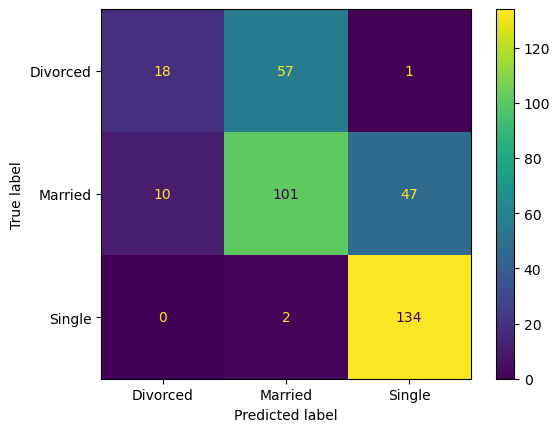

In [178]:
ConfusionMatrixDisplay.from_estimator(hr_model, X_test_, 
                      y_test);

In [179]:
print(classification_report(y_pred_hr, y_test))

              precision    recall  f1-score   support

    Divorced       0.24      0.64      0.35        28
     Married       0.64      0.63      0.64       160
      Single       0.99      0.74      0.84       182

    accuracy                           0.68       370
   macro avg       0.62      0.67      0.61       370
weighted avg       0.78      0.68      0.72       370



In [180]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train_, y_train)

RandomForestClassifier(max_depth=5)

In [182]:
y_pred = forest.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

    Divorced       1.00      0.03      0.05       252
     Married       0.64      0.82      0.72       521
      Single       0.77      1.00      0.87       337

    accuracy                           0.69      1110
   macro avg       0.80      0.62      0.55      1110
weighted avg       0.76      0.69      0.61      1110




In [183]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

    Divorced       0.00      0.00      0.00        76
     Married       0.59      0.72      0.65       158
      Single       0.74      0.98      0.84       136

    accuracy                           0.66       370
   macro avg       0.44      0.56      0.50       370
weighted avg       0.53      0.66      0.59       370




/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [184]:
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, classification_report

In [185]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_, y_train) 

DecisionTreeClassifier()

In [186]:
y_pred = dtc.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

    Divorced       1.00      1.00      1.00       252
     Married       1.00      1.00      1.00       521
      Single       1.00      1.00      1.00       337

    accuracy                           1.00      1110
   macro avg       1.00      1.00      1.00      1110
weighted avg       1.00      1.00      1.00      1110




In [187]:
y_pred = dtc.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

    Divorced       0.43      0.39      0.41        76
     Married       0.51      0.56      0.53       158
      Single       0.73      0.69      0.71       136

    accuracy                           0.57       370
   macro avg       0.56      0.55      0.55       370
weighted avg       0.58      0.57      0.57       370




In [188]:
logistic = LogisticRegression(max_iter=10000) 
logistic.fit(X_train_, y_train)

LogisticRegression(max_iter=10000)

In [189]:
y_pred = logistic.predict(X_train_)
report = classification_report(y_train, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

    Divorced       0.61      0.23      0.33       252
     Married       0.67      0.73      0.70       521
      Single       0.75      1.00      0.86       337

    accuracy                           0.70      1110
   macro avg       0.68      0.65      0.63      1110
weighted avg       0.68      0.70      0.66      1110




In [190]:
y_pred = forest.predict(X_test_)
report = classification_report(y_test, y_pred)
print(f"Model - Classification Report:\n{report}\n")

Model - Classification Report:
              precision    recall  f1-score   support

    Divorced       0.00      0.00      0.00        76
     Married       0.59      0.72      0.65       158
      Single       0.74      0.98      0.84       136

    accuracy                           0.66       370
   macro avg       0.44      0.56      0.50       370
weighted avg       0.53      0.66      0.59       370




/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mattgracer/anaconda3/envs/ernie/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

#### Summary of Results for Multi-Class Study

- Decision Tree Classifier train data had near perfect scores so very strong results
- Logistic Regression had strongest results for Single and Married Categories
- Accuracy scores were above 60% so somewhat strong